In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [2]:
# MNIST 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

print(len(train_X), len(test_X))

11493376/11490434 [==============================] - 3s 0us/step
60000 10000


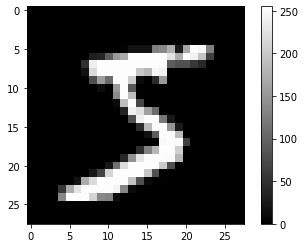

5


In [3]:
# 데이터 확인
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [4]:
#데이터 정규화
train_X = train_X /255.0
test_X = test_X /255.0

train_Y_onehot = tf.keras.utils.to_categorical(train_Y, num_classes = 10)
test_Y_onehot = tf.keras.utils.to_categorical(test_Y, num_classes = 10)

In [5]:
# MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_X, train_Y_onehot, epochs=5, validation_split=0.25)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1407/1407 [==============================] - 4s 2ms/step - loss: 0.3458 - accuracy: 0.8926 - val_loss: 0.1123 - val_accuracy: 0.9653
Epoch 2/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1022 - accuracy: 0.9689 - va

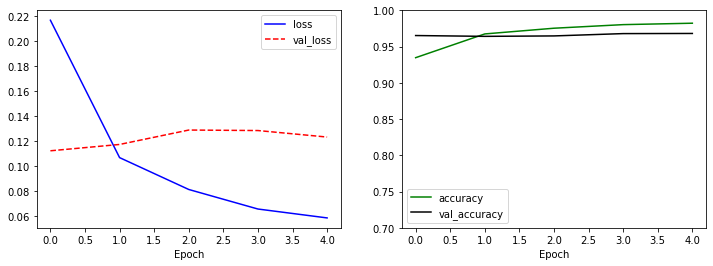

In [6]:
# MNIST 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label='val_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [8]:
# MNIST 분류 모델 평가
model.evaluate(test_X, test_Y_onehot )

313/313 [==============================] - 0s 823us/step - loss: 0.1108 - accuracy: 0.9716


[0.11083479970693588, 0.9715999960899353]